Information about the relations between strains and wild mouse derived strains:

https://www.nature.com/articles/s41588-018-0223-8#Sec1

In [1]:
import os
import math
import numpy as np
import pandas as pd
import requests, sys
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import pearsonr, spearmanr

In [2]:
#reading mt annotation and add d-loop
mm_annot=pd.read_csv('/Volumes/motilin/balint/numt/mice_strains_numt/mt_annotations/mm.bed',sep='\t',header=None)
mm_annot.columns=['mt','START','END','DESCRIPTION','significance','strand']
mm_annot.loc[len(mm_annot)]=['MT',15422,16249,'D-loop',0.001,'+']
mm_annot

,mt,START,END,DESCRIPTION,significance,strand
0,MT,0,68,trnF(ttc),1.020000e-12,+
1,MT,68,1024,rrnS,6.247000e-59,+
2,MT,1024,1093,trnV(gta),1.033000e-09,+
3,MT,1091,2677,rrnL,1.793000e-36,+
4,MT,2675,2750,trnL2(tta),6.955000e-07,+
5,MT,2747,3698,nad1,2.304540e+08,+
6,MT,3705,3774,trnI(atc),4.338000e-13,+
7,MT,3771,3842,trnQ(caa),4.059000e-11,-
8,MT,3844,3913,trnM(atg),8.797000e-09,+
9,MT,3913,4945,nad2,1.633874e+08,+


In [3]:
#reading csv files
def read_dfs(filename):
    try:
        df=pd.read_csv(f'/Volumes/motilin/balint/numt/mice_strains_numt/csvs/{filename}')
        return df
    except:
        return np.nan
    
dfs=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/')).apply(read_dfs)
dfs.index=pd.Series(os.listdir('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/')).apply(lambda filename:filename[:-10])
dfs=dfs.dropna()
dfs

Mus_musculus_lpj                score      eg2_value        e_value g_id ...
Mus_musculus_c3hhej             score      eg2_value        e_value g_id ...
Mus_musculus_balbcj             score      eg2_value        e_value g_id ...
Mus_musculus_aj                 score  eg2_value   e_value g_id   g_start...
Mus_musculus_casteij            score      eg2_value        e_value g_id ...
Mus_musculus_nodshiltj          score      eg2_value        e_value g_id ...
Mus_musculus_akrj               score      eg2_value        e_value g_id ...
Mus_musculus_wsbeij             score      eg2_value        e_value g_id ...
Mus_musculus_dba2j              score      eg2_value        e_value g_id ...
Mus_musculus_129s1svimj         score      eg2_value        e_value g_id ...
Mus_musculus_pwkphj             score      eg2_value        e_value g_id ...
Mus_musculus                    score      eg2_value        e_value g_id ...
Mus_musculus_cbaj               score      eg2_value        e_value g_id ...

In [4]:
#correct artefacts
def del_artefacts(df):
    df=df[df['mt_start']<17000]
    return df
dfs=dfs.apply(del_artefacts)

In [5]:
#add organism names
def add_organism_name(organism_name):
    df=dfs[organism_name]
    df['organism_name']=len(df)*[organism_name]
pd.Series(dfs.index.values).apply(add_organism_name)
dfs

/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_37620/2212027373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['organism_name']=len(df)*[organism_name]


Mus_musculus_lpj                score      eg2_value        e_value g_id ...
Mus_musculus_c3hhej             score      eg2_value        e_value g_id ...
Mus_musculus_balbcj             score      eg2_value        e_value g_id ...
Mus_musculus_aj                 score  eg2_value   e_value g_id   g_start...
Mus_musculus_casteij            score      eg2_value        e_value g_id ...
Mus_musculus_nodshiltj          score      eg2_value        e_value g_id ...
Mus_musculus_akrj               score      eg2_value        e_value g_id ...
Mus_musculus_wsbeij             score      eg2_value        e_value g_id ...
Mus_musculus_dba2j              score      eg2_value        e_value g_id ...
Mus_musculus_129s1svimj         score      eg2_value        e_value g_id ...
Mus_musculus_pwkphj             score      eg2_value        e_value g_id ...
Mus_musculus                    score      eg2_value        e_value g_id ...
Mus_musculus_cbaj               score      eg2_value        e_value g_id ...

In [23]:
#create one df
merged_df=pd.concat(dfs.tolist())
merged_df

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,organism_name
0,2464,0.000000e+00,0.000000e+00,4,79861757,12489,2871,2869,+,+,160599618,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...,Mus_musculus_lpj
1,719,0.000000e+00,0.000000e+00,5,85796228,4846,1591,1594,+,+,158326599,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...,Mus_musculus_lpj
2,695,0.000000e+00,0.000000e+00,4,6615132,3198,1326,1316,+,+,160599618,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...,Mus_musculus_lpj
3,502,3.800000e-222,5.500000e-226,5,4352349,14716,755,752,+,+,158326599,GCCATAGTAATTTTTCATCTCCTTTTTCCTTCACAAAACAGGATCA...,GCCCTAGCAATCGTTCACCTCCTCTT-CCTCCACGAAACAGGATCA...,Mus_musculus_lpj
4,459,1.100000e-201,1.600000e-205,8,104019782,14923,1183,1214,+,+,133211073,AATGCCCTCCATACCCTACCCCACATTAAACCAGAATGATACTTCC...,AATCCACTAAACACCCCACCCCATATTAAACCCGAATGATATTTCC...,Mus_musculus_lpj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,41,1.000000e-02,1.600000e-06,5,115963696,11783,95,95,+,-,152823684,TTCAGTAATGCCGTAGATAGGCAATATGGAAGGATGGCAATTATTC...,TTGAGTAGTGTAAGAGATGGGTTATAAGGAAGAATTGCTAGTATTC...,Mus_musculus_spreteij
154,41,1.000000e-02,1.600000e-06,6,82884678,3839,57,57,+,-,150978388,GTTGGGCCTTCTATAGCTGATGGAAGTCATGGATGAAGTCCGAATT...,GTAGGGCCTTCTATTGCTGATGGTAGTCATGGGTGGAGACCAAATT...,Mus_musculus_spreteij
155,41,1.000000e-02,1.600000e-06,6,120583627,10964,67,67,+,-,150978388,TTTATGAATATAGGTAACATGGCTGAGGAAGCGTCAGACTATGAAT...,TTAATGAACATAGGTAAAATGGCTGAGTAAGCATTAGACTGTAAAT...,Mus_musculus_spreteij
156,41,1.000000e-02,1.600000e-06,7,23586654,15588,65,65,+,-,136257712,AACATCATTTTAGGGTTTGCTGAAGATGGCCATGTATTGACTAAAC...,AATACCTTTTTAGGGTTTGCTGAAGATGGCGGTATATAGGCTGAAT...,Mus_musculus_spreteij


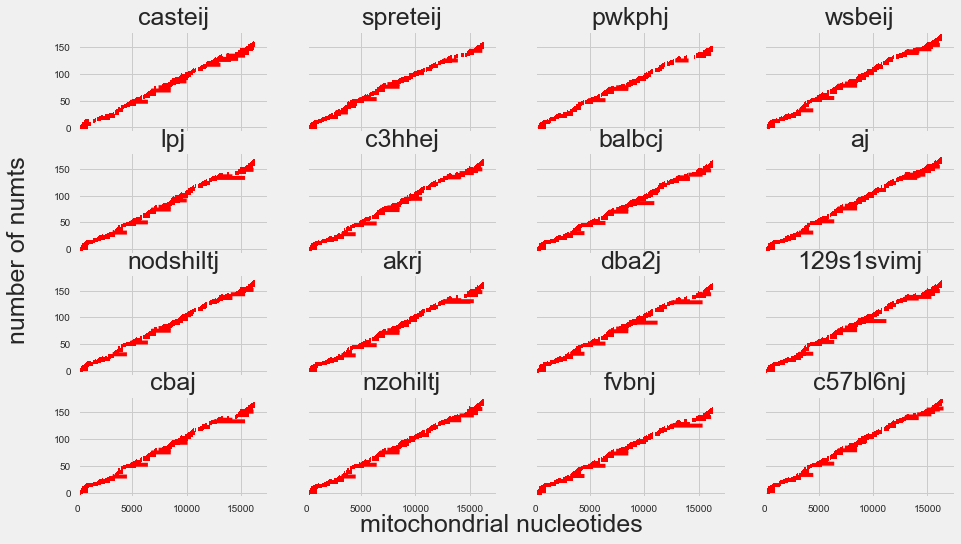

In [45]:
plt.style.use('fivethirtyeight')
fig,axs=plt.subplots(4,4,figsize=(14,8),sharey=True,sharex=True)
fig.text(0.5, 0.01, 'mitochondrial nucleotides', ha='center',fontsize=25)
fig.text(0.01, 0.5, 'number of numts', va='center', rotation='vertical',fontsize=25)

def numt_plotter(subdf):
    global row_tracker
    global column_tracker
    if column_tracker==4:
        column_tracker+=-4
        row_tracker+=1
    subdf=subdf.sort_values(by='mt_start')
    axs[row_tracker,column_tracker].set_xlim(0,17500)
    xs=subdf.apply(lambda row:np.arange(row['mt_start'],(row['mt_start']+row['mt_length']),1),axis=1).tolist()
    for index,x in enumerate(xs):
        y=len(x)*[index]
        axs[row_tracker,column_tracker].plot(x,y,'r')
    title=subdf['organism_name'].unique()[0].split('_')[-1]
    axs[row_tracker,column_tracker].set_title(title,fontsize=25)
    column_tracker+=1

column_tracker=0    
row_tracker=0

dfs.loc[['Mus_musculus_casteij','Mus_musculus_spreteij', 'Mus_musculus_pwkphj','Mus_musculus_wsbeij',
         'Mus_musculus_lpj', 'Mus_musculus_c3hhej', 'Mus_musculus_balbcj',
       'Mus_musculus_aj', 
       'Mus_musculus_nodshiltj', 'Mus_musculus_akrj',
        'Mus_musculus_dba2j',
       'Mus_musculus_129s1svimj', 
       'Mus_musculus_cbaj', 'Mus_musculus_nzohiltj', 'Mus_musculus_fvbnj',
       'Mus_musculus_c57bl6nj']].apply(numt_plotter)

plt.savefig('../../results/mitochondrial_origins.png',dpi=400)

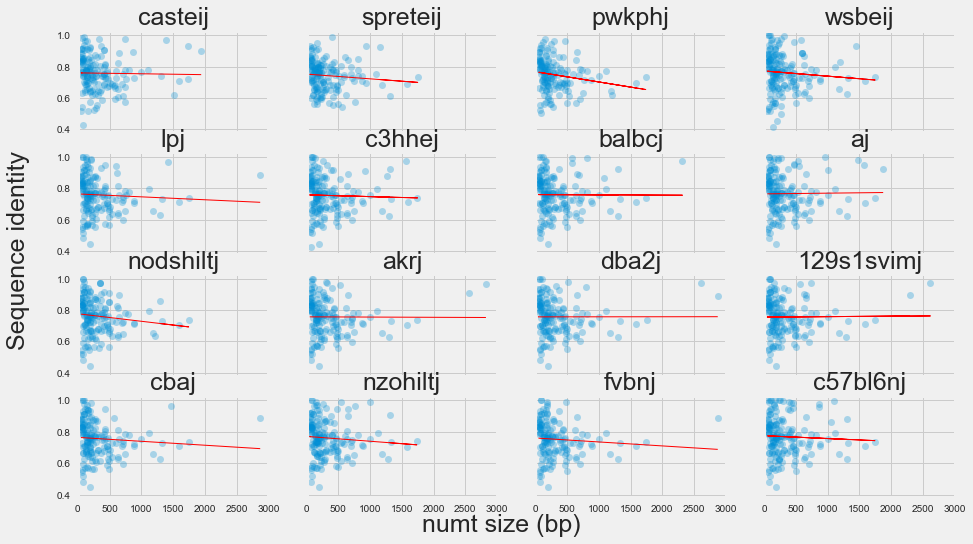

In [46]:

def identity(row):
    g_seq=row['g_sequence']
    mt_seq=row['mt_sequence']
    indices=pd.Series(np.arange(0,len(g_seq)))
    identical_nucleotides=[]
    indices.apply(lambda index: identical_nucleotides.append(1) if g_seq[index]==mt_seq[index] else
                 identical_nucleotides.append(0))
    seq_identity=sum(identical_nucleotides)/len(g_seq)
    return seq_identity


merged_df['identity']=merged_df.apply(identity,axis=1)

subdfs=pd.Series(merged_df['organism_name'].unique()).apply(
    lambda org_name:merged_df.loc[merged_df['organism_name']==org_name])
subdfs.index=merged_df['organism_name'].unique()

fig,axs=plt.subplots(4,4,figsize=(14,8),sharey=True,sharex=True)
fig.text(0.5, 0.01, 'numt size (bp)', ha='center',fontsize=25)
fig.text(0.01, 0.5, 'Sequence identity', va='center', rotation='vertical',fontsize=25)

def plotter(subdf):
    global row_tracker
    global column_tracker
    if column_tracker==4:
        column_tracker+=-4
        row_tracker+=1
    axs[row_tracker,column_tracker].plot(subdf['g_length'],subdf['identity'],'o',alpha=0.3)
    axs[row_tracker,column_tracker].set_xlim(0,3000)
    title=subdf['organism_name'].unique()[0].split('_')[-1]
    axs[row_tracker,column_tracker].set_title(title,fontsize=25)
    m, b = np.polyfit(subdf['g_length'],subdf['identity'], 1)
    axs[row_tracker,column_tracker].plot(subdf['g_length'], m*subdf['g_length'] + b,'r',linewidth=1)
    column_tracker+=1

row_tracker=0
column_tracker=0    
    
subdfs.loc[['Mus_musculus_casteij','Mus_musculus_spreteij', 'Mus_musculus_pwkphj','Mus_musculus_wsbeij',
         'Mus_musculus_lpj', 'Mus_musculus_c3hhej', 'Mus_musculus_balbcj',
       'Mus_musculus_aj', 
       'Mus_musculus_nodshiltj', 'Mus_musculus_akrj',
        'Mus_musculus_dba2j',
       'Mus_musculus_129s1svimj', 
       'Mus_musculus_cbaj', 'Mus_musculus_nzohiltj', 'Mus_musculus_fvbnj',
       'Mus_musculus_c57bl6nj']].apply(plotter)

plt.savefig('../../results/sequence_identities.png',dpi=400)

/var/folders/g2/9pvgl5793mxgz8dg4mhwym0m0000gn/T/ipykernel_34997/1859100375.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['','',0,25,50,75,100,125,150])


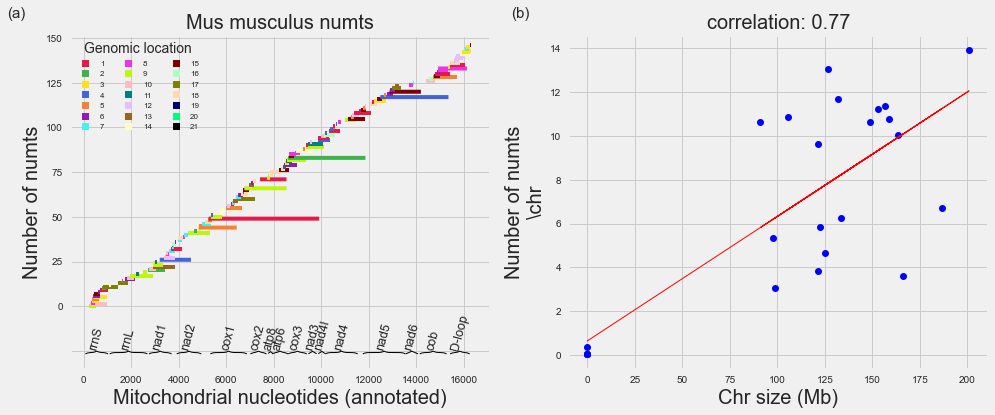

In [47]:
#try to get as different colors as possible
colors=pd.Series(['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',
                  '#bcf60c','#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3',
                  '#808000', '#ffd8b1','#000075', '#00FF7F','#000000'], index=np.arange(1,22,1))

#get custom legend colors
custom_lines_color=colors.apply(lambda color: Line2D([0],[0],
                                                         color=color,
                                                         lw=0,
                                                         marker='s',
                                                        markersize=7)).tolist()

#function for drawing brackets to annotate each mitochondrial part
def annotate_mitochondrion(ax, xspan, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin
    ymin, ymax = ax.get_ylim()
    yspan = 10
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:resolution//2+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = ymin + (.15*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y-20, color='black', lw=1)

    ax.text((xmax+xmin)/2., ymin-18, text, ha='center', va='bottom', fontsize=12.5,rotation=75)

fig,axs=plt.subplots(1,2,figsize=(14,6))
mmdf=dfs.loc['Mus_musculus']
mmdf=mmdf.sort_values(by='mt_start')
mmdf=mmdf[mmdf['mt_start']<min(mmdf['g_size'])]
mmdf=mmdf.loc[~mmdf['g_id'].isin(['MT','X'])]
g_ids=mmdf['g_id']
g_ids.index=np.arange(0,len(g_ids))
xs=mmdf.apply(lambda row:np.arange(row['mt_start'],(row['mt_start']+row['mt_length']),1),axis=1).tolist()
for index,x in enumerate(xs):
    y=len(x)*[index]
    axs[0].plot(x,y,colors[int(mmdf['g_id'][index])])
for index, start in enumerate(mm_annot['START']):
    if (mm_annot['END'][index]-start)>100:
        annotate_mitochondrion(axs[0],(start,mm_annot['END'][index]),mm_annot['DESCRIPTION'][index])
axs[0].set_ylim(-35,152)
axs[0].set_yticklabels(['','',0,25,50,75,100,125,150])
legend=axs[0].legend(custom_lines_color,colors.index.values, loc='upper left', title='Genomic location',
                  fontsize=8,ncol=3)
axs[0].set_xlabel('Mitochondrial nucleotides (annotated)',fontsize=20)
axs[0].set_ylabel('Number of numts',fontsize=20)
axs[0].set_title('Mus musculus numts',fontsize=20)

#correlation between chr sizes and numt counts-->attention chr sizes are not uniform through strains!
subdfs=pd.Series(merged_df['g_id'].unique()).apply(lambda g_id: merged_df.loc[merged_df['g_id']==g_id])
chr_sizes=subdfs.apply(lambda subdf: np.mean(subdf['g_size'].unique()))
numt_counts=subdfs.apply(lambda subdf: len(subdf))
numt_counts=numt_counts/len(dfs)
chr_sizes=chr_sizes/1000000
axs[1].plot(chr_sizes,numt_counts,'bo')
m, b = np.polyfit(chr_sizes,numt_counts, 1)
axs[1].plot(chr_sizes, m*chr_sizes + b,color='red',linewidth=1)
axs[1].set_xlabel('Chr size (Mb)',fontsize=20)
axs[1].set_ylabel('Number of numts\n\chr',fontsize=20)
axs[1].set_title(f'correlation: {round(pearsonr(chr_sizes,numt_counts)[0],2)}', fontsize=20)
axs[0].text(-.15,1.05,'(a)',transform=axs[0].transAxes,fontsize=15)
axs[1].text(1.05,1.05,'(b)',transform=axs[0].transAxes,fontsize=15)
plt.tight_layout()
plt.savefig('../../results/mm_numts_corr.png',dpi=400)

In [11]:
mm_df=dfs['Mus_musculus']

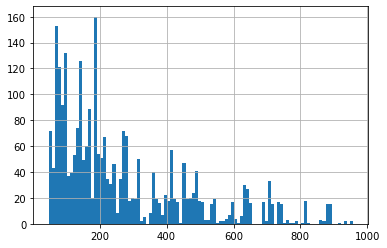

In [35]:
ax=merged_df[merged_df['g_length']<1000]['g_length'].hist(bins=100)